<center><br><font size=10>Pandas Tutorial</font><br>
<b>Introduction to Machine Learning</b>
<br><br>
<b>Author</b>: Michael Levinger - michaelethanlevinger@gmail.com
<br>*March 2020*</center>

In this notebook, we'll learn the basics of data analysis with the Python Pandas library.

<img src="https://pandas.pydata.org/_static/pandas_logo.png" width=500>
<br><br>For that, we will use an **IMDb** Data Set!
<img src="https://m.media-amazon.com/images/G/01/IMDb/BG_rectangle._CB1509060989_SY230_SX307_AL_.png" width=200>

# Table of Contents
* [Pandas Objects](#Pandas-Objects)
* [DataFrame Attributes and Methods](#DataFrame-Attributes-and-Methods)
* [Relational Algebra](#Relational-Algebra)
* [Data Exploration and Preparation](#Data-Exploration-and-Preparation)
* [Plotting](#Plotting)

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

# Pandas Objects

## Series
The basic Pandas object: **A one-Dimentional array, with index and values.**
<br>Equivilant to 1-d numpy array.

In [2]:
s = pd.Series([1,3,5,np.nan,6,8], index = ["A", "B", "C", "D", "E", "F"])
s

A    1.0
B    3.0
C    5.0
D    NaN
E    6.0
F    8.0
dtype: float64

In [3]:
print(s.mean())
print(s.std())

4.6
2.701851217221259


## DataFrame
**The MOST IMPORTANT pandas object**, equivilant to 2-d numpy array.
<br><br>
**Main features**:
- The **DataFrame** has both row and column index!
- Each column can be in a different type
- Size mutable: insert and delet columns

In [4]:
df = pd.DataFrame(np.random.randn(6,4), columns=["A","B","C","D"], index = [2,3,4,5,6,7])
df

,A,B,C,D
2,-1.333873,2.210001,1.260483,0.835290
3,0.659367,0.974540,-2.019958,0.077783
4,0.761594,1.603383,0.336750,-1.663678
5,1.088258,0.186462,0.670630,1.733698
6,-0.856376,-0.142205,-0.121378,1.445359
7,0.123936,-0.707691,-1.006497,2.433280


Creating a DataFrame by passing a dict of objects that can be converted to series-like (less common).

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'), # a one timestanp object ('2013-01-02')
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),  # a series of "1"s, length=4
                    'D': np.array([3] * 4, dtype='int32'),  # a numpy array of "3"s, length=4
                    'E': pd.Categorical(["test", "train", "test", "train"]),  # a pandas catergorical array (like a list)
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Create DataFrame from .csv file

In [6]:
df = pd.read_csv("./IMDB-Movie-Data.csv", index_col=0) # index_col - Choose which column of the data is going to be the index.

---
# DataFrame Attributes and Methods

## `head()` & `tail()`
Viewing the top (or bottom) rows of your data (5 rows if not defined other).

In [7]:
df.head(3)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
ID,,,,,,,,,,,
10066,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
36452,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
41798,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [8]:
df.tail(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
ID,,,,,,,,,,,
54715,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
83080,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


## `columns`

In [9]:
df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

## `rename`
Let's do a tiny columns cleanup.

In [10]:
df.rename(columns={ 'Runtime (Minutes)': 'Runtime', 
                    'Revenue (Millions)': 'Revenue_millions'
                   }, inplace=True) # Note the inplace!

df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [11]:
df.columns = [col.lower() for col in df]
df.columns

Index(['title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime', 'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## `shape`

In [12]:
df.shape

(1000, 11)

## `dtype`
The columns of the resulting DataFrame have different **dtypes** (data types).

In [13]:
df.dtypes

title                object
genre                object
description          object
director             object
actors               object
year                  int64
runtime               int64
rating              float64
votes                 int64
revenue_millions    float64
metascore           float64
dtype: object

*__note__: "object" dtype means string. Will be assigned to your column if column has mixed types (numbers and strings).*

## `index`
The indeces of the data (row)

In [14]:
df.index

Int64Index([10066, 36452, 41798, 63054, 16233, 68178, 10033, 52344, 61536,
            29367,
            ...
            96581, 60368, 37045, 75252, 89837, 87845, 83535, 48221, 54715,
            83080],
           dtype='int64', name='ID', length=1000)

We can also reset the index:

In [15]:
new_idx_df = df.reset_index()
new_idx_df.head(3)

,ID,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
0,10066,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,36452,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,41798,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## `values`
Returns the DataFrame as a numpy array.

In [16]:
df.iloc[1].values

array(['Prometheus', 'Adventure,Mystery,Sci-Fi',
       'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
       'Ridley Scott',
       'Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron',
       2012, 124, 7.0, 485820, 126.46, 65.0], dtype=object)

## `describe()` (statistics)
shows a quick statistic summary of your data.

In [17]:
df.describe()

,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


All statistics above can be generated seperetly with their names as methods:
- `df.count()`
- `df.mean()`
- `df.std()`
- `df.max()`
- `df.min()`

## Sorting (Order By in SQL)
### `sort_values()`
Sorting by a specific column.

In [18]:
df = df.sort_values(by ="rating", ascending = False)  # default - ascending=True
df = df.sort_values(by =["rating", "votes"], ascending = False)
df.head(3)

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
ID,,,,,,,,,,,
18466,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
42508,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
18790,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


### `sort_index()`
Sort index - using **index (axis = 0)** or **columns (axis = 1)** - important!

In [19]:
df = df.sort_index(axis = 0, ascending = True)
df.head(3)

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
ID,,,,,,,,,,,
10033,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
10066,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
10073,Room,Drama,A young boy is raised within the confines of a...,Lenny Abrahamson,"Brie Larson, Jacob Tremblay, Sean Bridgers,Wen...",2015,118,8.2,224132,14.68,86.0


## `append()`

Append rows of another DataFrame to the end of this frame, returning a new object.<br>
Columns not in this frame are added as new columns.

In [20]:
temp_df = df.append(df)
temp_df.shape

(2000, 11)

## `remove_duplicates()`

In [21]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

method will also return a copy of your DataFrame, but this time with duplicates removed. Calling ``.shape`` confirms we're back to the 1000 rows of our original dataset.<br>  Using ``inplace=True`` will modify the DataFrame object in place

In [22]:
temp_df.drop_duplicates(inplace=True)

---
# Relational Algebra

## Projection ("Select" in SQL)

**Single column**

In [23]:
df["title"][0:7] # Will yield a *Series*

ID
10033                                      La La Land
10066                         Guardians of the Galaxy
10073                                            Room
10078                                          Frozen
10083    Harry Potter and the Deathly Hallows: Part 1
10102                                      The Intent
10430                                           Youth
Name: title, dtype: object

**Multiple Columns**

In [24]:
df[["title","genre"]][0:7]  # Will yeild a DataFrame

,title,genre
ID,,
10033,La La Land,"Comedy,Drama,Music"
10066,Guardians of the Galaxy,"Action,Adventure,Sci-Fi"
10073,Room,Drama
10078,Frozen,"Animation,Adventure,Comedy"
10083,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Family,Fantasy"
10102,The Intent,"Crime,Drama"
10430,Youth,"Comedy,Drama,Music"


## Selection / Slicing ("Where" in SQL)

### `.loc` - Slicing by Label

``.loc`` is primarily **index label based**, but may also be used with a boolean array. ``.loc`` will raise ``KeyError`` when the items are not found.

In [25]:
df.loc[10078]

title                                                          Frozen
genre                                      Animation,Adventure,Comedy
description         When the newly crowned Queen Elsa accidentally...
director                                                   Chris Buck
actors              Kristen Bell, Idina Menzel, Jonathan Groff, Jo...
year                                                             2013
runtime                                                           102
rating                                                            7.5
votes                                                          451894
revenue_millions                                               400.74
metascore                                                          74
Name: 10078, dtype: object

In [26]:
df.loc[10000:10100, ["title", "year"]]

,title,year
ID,,
10033,La La Land,2016
10066,Guardians of the Galaxy,2014
10073,Room,2015
10078,Frozen,2013
10083,Harry Potter and the Deathly Hallows: Part 1,2010


### `.iloc` - Slicing by position
(index position or column position)

In [27]:
df.iloc[3:5, 0:4]

,title,genre,description,director
ID,,,,
10078,Frozen,"Animation,Adventure,Comedy",When the newly crowned Queen Elsa accidentally...,Chris Buck
10083,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Family,Fantasy",As Harry races against time and evil to destro...,David Yates


### Slicing by Conditions -  Boolean Masks
**Important!!**

In [28]:
short_df = df.head()

In [29]:
short_df["year"] >= 2015

ID
10033     True
10066    False
10073     True
10078    False
10083    False
Name: year, dtype: bool

In [30]:
short_df2 = short_df[short_df["year"] >= 2015]
short_df2

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
ID,,,,,,,,,,,
10033,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
10073,Room,Drama,A young boy is raised within the confines of a...,Lenny Abrahamson,"Brie Larson, Jacob Tremblay, Sean Bridgers,Wen...",2015,118,8.2,224132,14.68,86.0


#### and / or
**We can also use the and ("&") or ("|") operators.**

In [31]:
df[(df['director'] == 'Christopher Nolan') & (df["year"] >= 2009)].head()

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
ID,,,,,,,,,,,
42508,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
82169,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
97042,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0


#### `isin()`

**We can also use the `isin()` function:**

In [32]:
df[df['director'].isin(['Alfonso Cuarón', 'Kathryn Bigelow'])]

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
ID,,,,,,,,,,,
51414,The Hurt Locker,"Drama,History,Thriller","During the Iraq War, a Sergeant recently assig...",Kathryn Bigelow,"Jeremy Renner, Anthony Mackie, Brian Geraghty,...",2008,131,7.6,352023,15.70,94.0
83233,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.08,96.0
93066,Zero Dark Thirty,"Drama,History,Thriller",A chronicle of the decade-long hunt for al-Qae...,Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7.4,226661,95.72,95.0
98579,Children of Men,"Drama,Sci-Fi,Thriller","In 2027, in a chaotic world in which women hav...",Alfonso Cuarón,"Julianne Moore, Clive Owen, Chiwetel Ejiofor,M...",2006,109,7.9,382910,35.29,84.0


## Grouping (GroupBy in SQL)

A ``groupby`` operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [33]:
df.groupby("director").size()[:5]

director
Aamir Khan             1
Abdellatif Kechiche    1
Adam Leon              1
Adam McKay             4
Adam Shankman          2
dtype: int64

** We can use aggregate functions except counting.**
```
SELECT director, AVG(rating) as average_rating, COUNT(*)

FROM movies

GROUP BY director

ORDER BY average_rating
```

In [34]:
df.groupby("director").agg({'rating': np.mean, "director":np.size}).sort_values(by ="rating", ascending = False).head()

,rating,director
director,,
Nitesh Tiwari,8.80,1
Christopher Nolan,8.68,5
Makoto Shinkai,8.60,1
Olivier Nakache,8.60,1
Florian Henckel von Donnersmarck,8.50,1


Notice that in the new DataFrame object, created by the groupby, the index is the column grouped by.

For more SQL comparisons: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

---
## Exercise

### Ex.1
Let's say we want all movies that were **released between 2010 and 2015**, have a **rating above 8.0**, but made **below the median revenue.**<br>
Show **top 5 by number of votes**.

Here's how we could do all of that:

### Ex.2
Who are the most "highest-grossing" directors? -<br>
AKA, Who are the top 5 directors that directed have the highest total revenue, and how many films each one directed?

### Ex.3
Create a table of the highest rated film by each of the directors from ex.2 (the table will contain directors name, title, and rating)

---
# Data Exploration and Preparation

## Missing Values

`isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

In [35]:
df.iloc[0:5].isnull()

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
ID,,,,,,,,,,,
10033,False,False,False,False,False,False,False,False,False,False,False
10066,False,False,False,False,False,False,False,False,False,False,False
10073,False,False,False,False,False,False,False,False,False,False,False
10078,False,False,False,False,False,False,False,False,False,False,False
10083,False,False,False,False,False,False,False,False,False,False,False


To count the number of nulls in each column we use an aggregate function for summing:

In [36]:
df.isnull().sum()

title                 0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

### Dropping missing values - `dropna()`

In [37]:
df.dropna().isnull().sum()

title               0
genre               0
description         0
director            0
actors              0
year                0
runtime             0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64

We can also drop columns (and not rows) by adding `axis = 1`

In [38]:
df.dropna(axis = 1).isnull().sum()

title          0
genre          0
description    0
director       0
actors         0
year           0
runtime        0
rating         0
votes          0
dtype: int64

### Imputing Missing Values - `fillna()`

In [39]:
revenue = df["revenue_millions"]
revenue.isnull().sum()

128

In [40]:
revenue_mean = revenue.mean()
revenue.fillna(revenue_mean, inplace=True) # note the "inplace". Values can also be imputer by row, by adding axis = 0
revenue.isnull().sum()

0

##  Normalization - Arithmetic Operations

For example, lest's normalize the votes column to be between 1 to 0 (min-max normalization)

In [41]:
df_copy = df.copy() # We want to COPY the DataFrame. Without using the "copy()" function, the new df will be a pointer to the old one.
df_copy["norm_votes"] = (df_copy["votes"] - df_copy["votes"].min()) / (df_copy["votes"].max() - df_copy["votes"].min())
df_copy[["norm_votes","votes"]].head()

,norm_votes,votes
ID,,
10033,0.144331,258682
10066,0.422474,757074
10073,0.125050,224132
10078,0.252159,451894
10083,0.199320,357213


### Broadcasting
Notice the Broadcasting in last line, in the `df_copy["votes"] - df_copy["votes"].min()` operation (an integer minus a series)!

## Feature Extraction / Engineering - `apply`

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the DataFrame, along its axis. 
For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad.

In [42]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what apply() does:

In [43]:
df["rating_category"] = df["rating"].apply(rating_function)

df[["title","rating","rating_category"]].head()

,title,rating,rating_category
ID,,,
10033,La La Land,8.3,good
10066,Guardians of the Galaxy,8.1,good
10073,Room,8.2,good
10078,Frozen,7.5,bad
10083,Harry Potter and the Deathly Hallows: Part 1,7.7,bad


We can also use anonymous functions as well. This `lambda` function achieves the same result as rating_function:

In [44]:
df["rating_category"] = df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

df[["title","rating","rating_category"]].head()

,title,rating,rating_category
ID,,,
10033,La La Land,8.3,good
10066,Guardians of the Galaxy,8.1,good
10073,Room,8.2,good
10078,Frozen,7.5,bad
10083,Harry Potter and the Deathly Hallows: Part 1,7.7,bad


## Plotting

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 10, 'figure.figsize': (6, 4)}) # set font and plot size to be larger

### Scatter

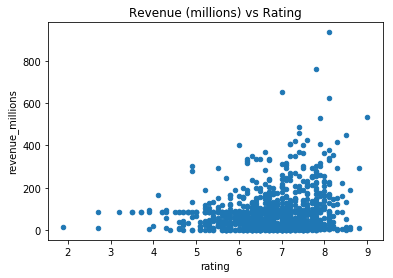

In [46]:
df.plot.scatter(x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');
plt.show()

### Distributions

#### Histogram

Let's plot the rating distribution:

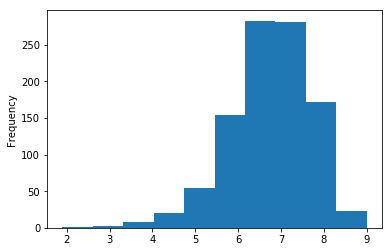

In [47]:
df['rating'].plot.hist()
plt.show()

We can also plot multiple histograms

#### Bar Plot

Let's plot how many films where created in each genre:

In [48]:
df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

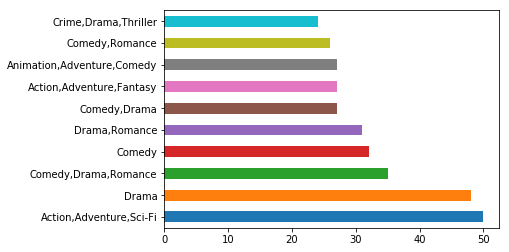

In [49]:
df['genre'].value_counts().head(10).plot.barh()
plt.show()

### Box Plot

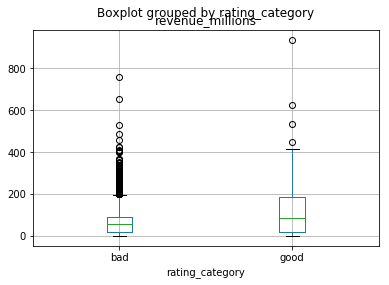

In [50]:
df.boxplot(column='revenue_millions', by='rating_category');
plt.show()

## Correlations

By using the correlation method .corr() we can generate the relationship between each continuous variable:

In [51]:
df.corr()

,year,runtime,rating,votes,revenue_millions,metascore
year,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


### Heatmap

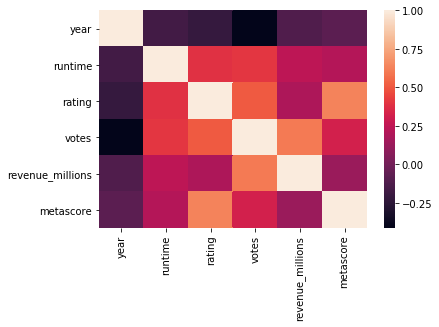

In [52]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)
plt.show()

## Exercise
### Ex.4
Create a new rating feature that takes both the rating and the metascore.
1. Change all ratings and metascore with below 100,000 votes to NaN.
2. Normalize the both ratings and metascore to be between 0 to 1 (like the ratings scale!)
3. Create a new feature, called "mixed_rating" to be the multiplication of the normalized column and the rating:
    <br>a. By using simple Arithmetic Operation.
    <br>b. By using the `apply` function.
4. Show top 5 movies with highest "mixed_rating"

### Ex.5
Plot the total movies revenue per year.

# Saving the Data

In [53]:
# Saving dataframe to CSV
df.to_csv("movies-db-processed.csv", index=False)

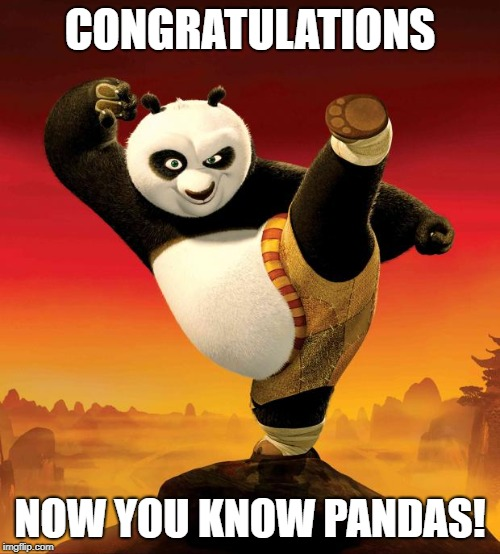